<a href="https://colab.research.google.com/github/MetehanSevgil/Machine_learning/blob/main/Proje.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Veri seti kan bağışçılarının ve Hepatit C hastalarının laboratuvar değerlerini ve yaş gibi demografik değerleri içermektedir.
df = pd.read_csv("/content/sample_data/HepatitisCdata.csv")

In [ ]:
df

,Unnamed: 0,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,1,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,2,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,3,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,4,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,5,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
610,611,3=Cirrhosis,62,f,32.0,416.6,5.9,110.3,50.0,5.57,6.30,55.7,650.9,68.5
611,612,3=Cirrhosis,64,f,24.0,102.8,2.9,44.4,20.0,1.54,3.02,63.0,35.9,71.3
612,613,3=Cirrhosis,64,f,29.0,87.3,3.5,99.0,48.0,1.66,3.63,66.7,64.2,82.0
613,614,3=Cirrhosis,46,f,33.0,NaN,39.0,62.0,20.0,3.56,4.20,52.0,50.0,71.0


In [ ]:
df = df.drop("Unnamed: 0", axis=1)
df

,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
610,3=Cirrhosis,62,f,32.0,416.6,5.9,110.3,50.0,5.57,6.30,55.7,650.9,68.5
611,3=Cirrhosis,64,f,24.0,102.8,2.9,44.4,20.0,1.54,3.02,63.0,35.9,71.3
612,3=Cirrhosis,64,f,29.0,87.3,3.5,99.0,48.0,1.66,3.63,66.7,64.2,82.0
613,3=Cirrhosis,46,f,33.0,NaN,39.0,62.0,20.0,3.56,4.20,52.0,50.0,71.0


In [ ]:
df.shape

(615, 13)

In [ ]:
df['Category'].unique()

array(['0=Blood Donor', '0s=suspect Blood Donor', '1=Hepatitis',
       '2=Fibrosis', '3=Cirrhosis'], dtype=object)

In [ ]:
# Hepatit C Virüs (HCV) enfeksiyonu sonucunda meydana gelen bir karaciğer hastalığıdır.
# Fibrozis (fibrosis), bir dokudaki ya da organdaki yoğun bağ dokusu artışına bağlı olarak ortaya çıkan katılaşmadır.
# Cirrhosis(siroz), karaciğerde ileri derecede hasar oluşumuna verilen isimdir.
df["Category"].replace({
    '0=Blood Donor': 0,
    '0s=suspect Blood Donor':1,
    '1=Hepatitis':2,
    '2=Fibrosis':3,
    '3=Cirrhosis':4,
}, inplace=True)
df

,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,0,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,0,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,0,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,0,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,0,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
610,4,62,f,32.0,416.6,5.9,110.3,50.0,5.57,6.30,55.7,650.9,68.5
611,4,64,f,24.0,102.8,2.9,44.4,20.0,1.54,3.02,63.0,35.9,71.3
612,4,64,f,29.0,87.3,3.5,99.0,48.0,1.66,3.63,66.7,64.2,82.0
613,4,46,f,33.0,NaN,39.0,62.0,20.0,3.56,4.20,52.0,50.0,71.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 615 entries, 0 to 614
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Category  615 non-null    int64  
 1   Age       615 non-null    int64  
 2   Sex       615 non-null    object 
 3   ALB       614 non-null    float64
 4   ALP       597 non-null    float64
 5   ALT       614 non-null    float64
 6   AST       615 non-null    float64
 7   BIL       615 non-null    float64
 8   CHE       615 non-null    float64
 9   CHOL      605 non-null    float64
 10  CREA      615 non-null    float64
 11  GGT       615 non-null    float64
 12  PROT      614 non-null    float64
dtypes: float64(10), int64(2), object(1)
memory usage: 62.6+ KB


In [ ]:
# Veri setimdeki eksik değerleri kontrol ediyorum.
df.isnull().sum()

Category     0
Age          0
Sex          0
ALB          1
ALP         18
ALT          1
AST          0
BIL          0
CHE          0
CHOL        10
CREA         0
GGT          0
PROT         1
dtype: int64

In [ ]:
## Eksik Değerleri Doldurma ##
# Veriler hastalığa göre üstten alta sıralı olduğu için boş değerleri bu şekilde doldurdum
# Bu fonksiyonla NaN değerler, kendinden bir önceki sütunla aynı değeri alacak şekilde doldurdum.
df = df.fillna(method='ffill', axis=0)
df

,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,0,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,0,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,0,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,0,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,0,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
610,4,62,f,32.0,416.6,5.9,110.3,50.0,5.57,6.30,55.7,650.9,68.5
611,4,64,f,24.0,102.8,2.9,44.4,20.0,1.54,3.02,63.0,35.9,71.3
612,4,64,f,29.0,87.3,3.5,99.0,48.0,1.66,3.63,66.7,64.2,82.0
613,4,46,f,33.0,87.3,39.0,62.0,20.0,3.56,4.20,52.0,50.0,71.0


In [ ]:
df.isnull().sum()

Category    0
Age         0
Sex         0
ALB         0
ALP         0
ALT         0
AST         0
BIL         0
CHE         0
CHOL        0
CREA        0
GGT         0
PROT        0
dtype: int64

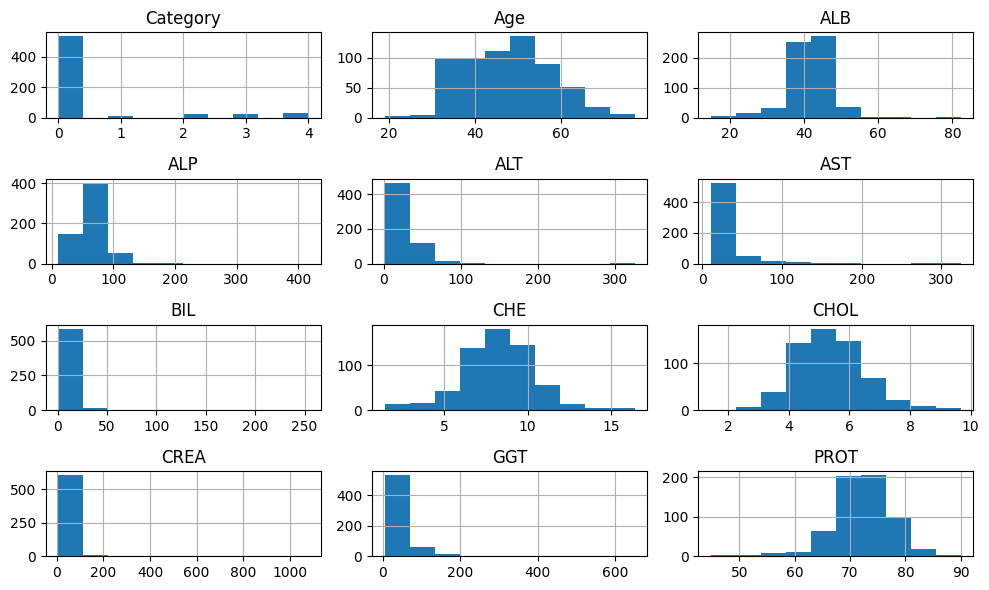

In [ ]:
df.hist(figsize=(10, 6), bins=10)
plt.tight_layout()
plt.show()

# **Normalizasyon**

Değişken içinde yer alan sayıları genellikle 0 ve 1 arasına hapseden bir yöntemdir. Min-Max Scalling olarak da bilinir.

Xnorm = (X − Xmin) / (Xmax − Xmin)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()

# Cinsiyet sınıfını erkek:1 , kadın:0 olarak ayarlıyorum
df['Sex'] = df['Sex'].map({'m': 1, 'f': 0})
# Normalizasyon işlemi uyguluyorum.
df.iloc[:, 1:] = scaler.fit_transform(df.iloc[:, 1:])
# Category yani hedef sınıfını listenin sonuna alıyorum.
df = df[[col for col in df.columns if col != 'Category'] + ['Category']]

df

,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT,Category
0,0.224138,1,0.350669,0.101653,0.020962,0.036694,0.026461,0.367578,0.218447,0.091495,0.011757,0.535398,0
1,0.224138,1,0.350669,0.145571,0.052713,0.044990,0.012243,0.650434,0.408981,0.061619,0.017172,0.701327,0
2,0.224138,1,0.475483,0.156427,0.108816,0.134014,0.020932,0.494997,0.457524,0.072822,0.044400,0.763274,0
3,0.224138,1,0.420505,0.100419,0.091554,0.038290,0.071485,0.394263,0.401699,0.067221,0.045328,0.683628,0
4,0.224138,1,0.361070,0.154947,0.097719,0.045310,0.034755,0.515677,0.350728,0.063486,0.039295,0.528761,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
610,0.741379,0,0.254086,1.000000,0.015413,0.318124,0.194313,0.276851,0.591019,0.044534,1.000000,0.524336,4
611,0.775862,0,0.135215,0.225759,0.006165,0.107849,0.075829,0.008005,0.192961,0.051349,0.048577,0.586283,4
612,0.775862,0,0.209510,0.187515,0.008015,0.282068,0.186414,0.016011,0.266990,0.054803,0.092358,0.823009,4
613,0.465517,0,0.268945,0.187515,0.117448,0.164008,0.075829,0.142762,0.336165,0.041079,0.070390,0.579646,4


In [ ]:
#hedef değişkenin sınıf dağılımı
df["Category"].value_counts()

Category
0    533
4     30
2     24
3     21
1      7
Name: count, dtype: int64

In [ ]:
# Hedef veri seti
y = df["Category"]
print("y:", str(y.shape))
# Özellikler
X = df.drop(columns=['Category'])
print("X:", str(X.shape))

y: (615,)
X: (615, 12)


# ÖZELLİK SEÇİM YÖNTEMLERİ

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=25)
# test_size=0.3 ile %30 test seti, kalan %70 i eğitim verisi olarak ayırdık.
# random_state parametresi, rastgele bölme işleminin tekrarlanabilirliğini sağlar.
print("X_train", str(X_train.shape))
print("X_test", str(X_test.shape))
print("y_train", str(y_train.shape))
print("y_test", str(y_test.shape))

X_train (430, 12)
X_test (185, 12)
y_train (430,)
y_test (185,)


# 1-) İleri Doğru Seçim (Step Forward Selection)

*   Çalışma tek bir değişkenden oluşan tüm alt kümeler değerlendirilerek başlar. Her bir feature için modeller kurulur. Bütün modellerin performansları değerlendirilir ve en iyi performansı gösteren değişken seçilir.

*   Seçilen değişkene veri kümesindeki diğer değişkenler tek tek eklenerek yeni alt kümeler oluşturulup, yeniden modeller kurulur. Bütün modellerin performansı değerlendirilip yine en iyi performansı gösteren seçilir.


*   Bu aşamalar belirlenen kritere ulaşılana kadar devam eder.

In [ ]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.ensemble import RandomForestRegressor

In [ ]:
# SFS ile step forward  özellik seçimi yapıyorum.
sfs = SFS(RandomForestRegressor(n_estimators= 10, n_jobs= 4, random_state= 10),
          k_features= 7, # Bu sayıyı deneyerek buldum.
          # Hangi özellik sayısında daha çok verimli olduğunu denedim.
          forward= True,
          floating = False,
          verbose = 2,
          scoring = 'r2',
          cv=5)

sfs = sfs.fit(X_train, y_train)


[2024-05-14 16:33:53] Features: 1/7 -- score: 0.4181553174622629
[2024-05-14 16:33:56] Features: 2/7 -- score: 0.6894165524661886
[2024-05-14 16:33:58] Features: 3/7 -- score: 0.7389724857009033
[2024-05-14 16:34:00] Features: 4/7 -- score: 0.7908892732306451
[2024-05-14 16:34:03] Features: 5/7 -- score: 0.7939615359535201
[2024-05-14 16:34:04] Features: 6/7 -- score: 0.8082258120114456
[2024-05-14 16:34:08] Features: 7/7 -- score: 0.8110500310715129

In [ ]:
# Algoritmanın çalışma mantığını gösterdim.
sfs.subsets_

{1: {'feature_idx': (5,),
  'cv_scores': array([0.33916948, 0.37688861, 0.26470069, 0.45530552, 0.65471228]),
  'avg_score': 0.4181553174622629,
  'feature_names': ('AST',)},
 2: {'feature_idx': (4, 5),
  'cv_scores': array([0.75284757, 0.84202575, 0.44974009, 0.61561484, 0.78685451]),
  'avg_score': 0.6894165524661886,
  'feature_names': ('ALT', 'AST')},
 3: {'feature_idx': (3, 4, 5),
  'cv_scores': array([0.75605734, 0.87391588, 0.51360402, 0.74600916, 0.80527602]),
  'avg_score': 0.7389724857009033,
  'feature_names': ('ALP', 'ALT', 'AST')},
 4: {'feature_idx': (2, 3, 4, 5),
  'cv_scores': array([0.88598015, 0.84704549, 0.63206132, 0.71225186, 0.87710753]),
  'avg_score': 0.7908892732306451,
  'feature_names': ('ALB', 'ALP', 'ALT', 'AST')},
 5: {'feature_idx': (2, 3, 4, 5, 10),
  'cv_scores': array([0.840095  , 0.93784378, 0.61743442, 0.69942873, 0.87500575]),
  'avg_score': 0.7939615359535201,
  'feature_names': ('ALB', 'ALP', 'ALT', 'AST', 'GGT')},
 6: {'feature_idx': (2, 3, 4, 5,

In [ ]:
# Seçilen özelliklerin indeksleri
selected_features_indices_sfs = sfs.k_feature_idx_
print("Step Forward yöntemi ile seçilen özelliklerin indeksleri: ", end="")
print(selected_features_indices_sfs)

# Seçilen özelliklerin adları
selected_features_names_sfs = X_train.columns[list(selected_features_indices_sfs)]
print("Step Forward yöntemi ile seçilen özelliklerin adları: ")
print(selected_features_names_sfs)

Step Forward yöntemi ile seçilen özelliklerin indeksleri: (1, 2, 3, 4, 5, 7, 10)
Step Forward yöntemi ile seçilen özelliklerin adları: 
Index(['Sex', 'ALB', 'ALP', 'ALT', 'AST', 'CHE', 'GGT'], dtype='object')


In [ ]:
X_train_sfs = X_train.iloc[:, list(selected_features_indices_sfs)]
X_test_sfs = X_test.iloc[:, list(selected_features_indices_sfs)]
print("X_train_sfs:", str(X_train_sfs.shape))
print("X_test_sfs:", str(X_test_sfs.shape))

X_train_sfs: (430, 7)
X_test_sfs: (185, 7)


In [ ]:
selected_features_sfs = X.iloc[:, list(selected_features_indices_sfs)]
print("selected_features_sfs:", str(selected_features_sfs.shape))

selected_features_sfs: (615, 7)


In [ ]:
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

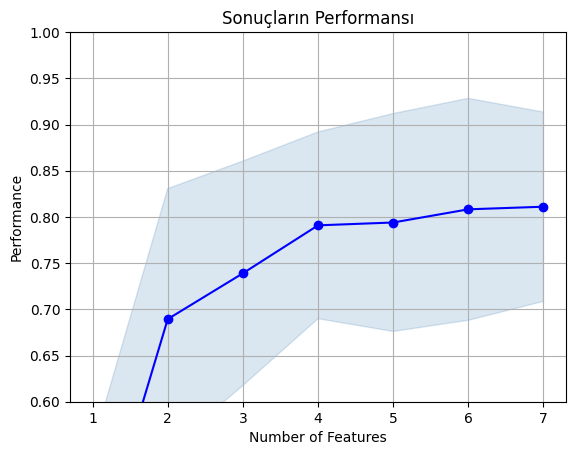

In [ ]:
figl = plot_sfs(sfs.get_metric_dict(), kind = 'std_dev')
plt.ylim([0.6, 1])
plt.title('Sonuçların Performansı')
plt.grid()
plt.show()

# 2-) Pearson Korelasyon Yöntemi


*   Bu yöntem, sayısal girdi ve çıktı değişkenleri arasındaki ilişkiyi ölçmek için kullanılır.
*   Pearson Korelasyonu Özellik Seçim Yöntemidir.
*   Bağımlı ve bağımsız değişkenler arasındaki yön ve gücü gösterir.
*   Değeri -1 ile 1 arasında değişir .

In [ ]:
corr = X.corr()
corr

,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
Age,1.000000,-0.024544,-0.198264,0.164897,-0.021529,0.088666,0.032492,-0.075093,0.123985,-0.022296,0.153087,-0.153561
Sex,-0.024544,1.000000,0.145454,-0.019862,0.160047,0.130891,0.111177,0.169111,-0.029565,0.159589,0.133276,0.050755
ALB,-0.198264,0.145454,1.000000,-0.123752,0.011220,-0.193793,-0.221673,0.376018,0.212580,-0.001405,-0.156441,0.551233
ALP,0.164897,-0.019862,-0.123752,1.000000,0.089440,0.036594,0.003089,0.039928,0.147796,0.143333,0.412092,-0.076857
ALT,-0.021529,0.160047,0.011220,0.089440,1.000000,0.246455,-0.038651,0.143759,0.066142,-0.040104,0.218003,0.055865
AST,0.088666,0.130891,-0.193793,0.036594,0.246455,1.000000,0.312231,-0.208536,-0.213714,-0.021387,0.491263,0.038426
BIL,0.032492,0.111177,-0.221673,0.003089,-0.038651,0.312231,1.000000,-0.333172,-0.185433,0.031224,0.217024,-0.048909
CHE,-0.075093,0.169111,0.376018,0.039928,0.143759,-0.208536,-0.333172,1.000000,0.424832,-0.011157,-0.110345,0.295028
CHOL,0.123985,-0.029565,0.212580,0.147796,0.066142,-0.213714,-0.185433,0.424832,1.000000,-0.048274,-0.013434,0.206172
CREA,-0.022296,0.159589,-0.001405,0.143333,-0.040104,-0.021387,0.031224,-0.011157,-0.048274,1.000000,0.121003,-0.032095


<Axes: >

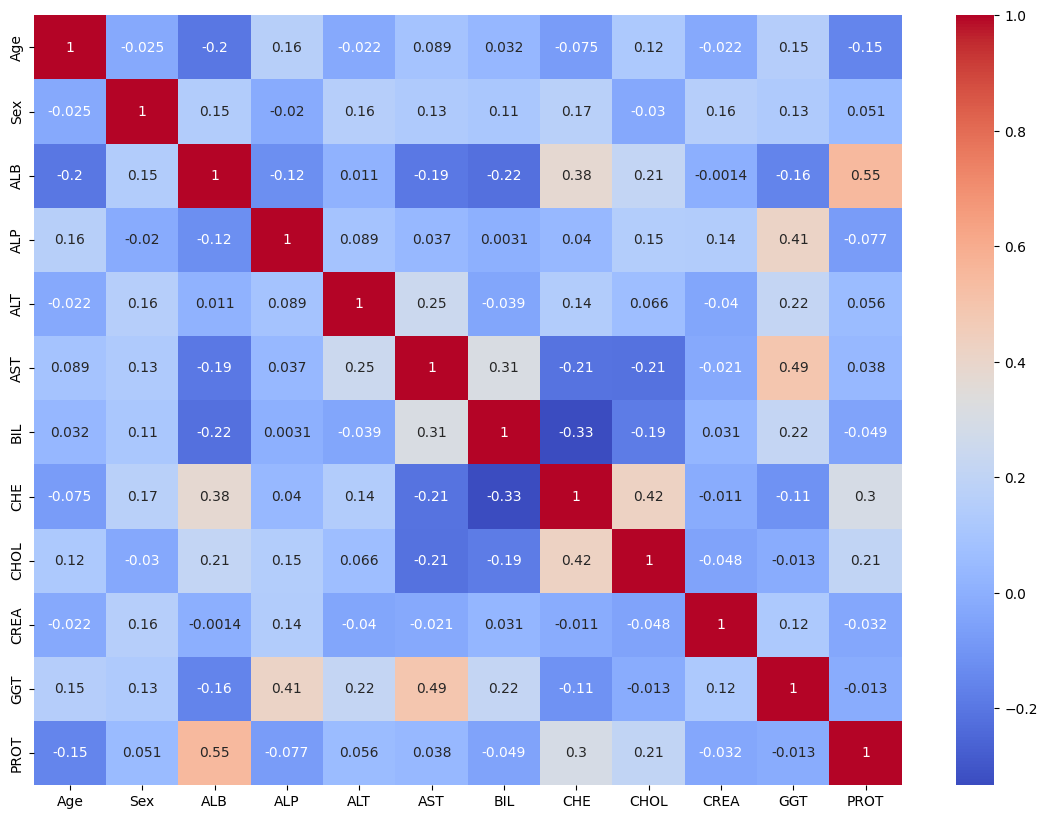

In [ ]:
plt.figure(figsize=(14,10))
sns.heatmap(corr, annot=True, cmap='coolwarm')

In [ ]:
from  sklearn.feature_selection  import f_regression, SelectKBest

In [ ]:
# f_regression yöntemi pearson korelasyonu için kullanılır.
# En iyi k özellikleri seçmek için  SelectKBest yöntemi kullandım.
k_best_features = SelectKBest(score_func=f_regression, k=5)  # 5 özellik seçtim.

In [ ]:
selected_features = k_best_features.fit_transform(X, y)
print("İşlem yapıldıktan sonra özellik sayısı:", selected_features.shape)

İşlem yapıldıktan sonra özellik sayısı: (615, 5)


In [ ]:
# Seçilen özelliklerin indeksleri
selected_features_indices_corr = k_best_features.get_support(indices=True)
print("Pearson Korelasyon yöntemi ile seçilen özelliklerin indeksleri:" , end="")
print(selected_features_indices_corr)

# Seçilen özelliklerin adları
selected_features_names_corr = X.columns[selected_features_indices_corr]
print("Pearson korelasyon yöntemi ile seçilen özelliklerin adları:")
selected_features_names_corr

Pearson Korelasyon yöntemi ile seçilen özelliklerin indeksleri:[ 5  6  7  8 10]
Pearson korelasyon yöntemi ile seçilen özelliklerin adları:


Index(['AST', 'BIL', 'CHE', 'CHOL', 'GGT'], dtype='object')

In [ ]:
X_train_corr = X_train.iloc[:, list(selected_features_indices_corr)]
X_test_corr = X_test.iloc[:, list(selected_features_indices_corr)]
print("X_train_corr:", str(X_train_corr.shape))
print("X_test_corr:", str(X_test_corr.shape))

X_train_corr: (430, 5)
X_test_corr: (185, 5)


In [ ]:
selected_features_corr = X.iloc[:, list(selected_features_indices_corr)]
print("selected_features_corr:", str(selected_features_corr.shape))

selected_features_corr: (615, 5)


# 3-) Adımsal Seçim (Stepwise/Exhaustive Selection)
Bu yöntem için her bir değişken diğer değişkenler ile birlikte değerlendiren bir yapıya sahiptir. Dolayısıyla bu yöntem hem ileri hem de geri seçim yapma yöntemlerinin bir sentezidir diyebiliriz.

In [ ]:
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS

In [ ]:
# EFS ile exhaustive özellik seçimi yapıyorum.
efs = EFS(RandomForestRegressor(n_estimators=10, n_jobs=8, random_state=10),
          min_features=2, # en az 2 özellik
          max_features=4, # en fazla 4 özellik alsın
          scoring='r2',
          print_progress=True,
          cv=4)

efs.fit(X_train, y_train)

Features: 781/781

ExhaustiveFeatureSelector(cv=4,
                          estimator=RandomForestRegressor(n_estimators=10,
                                                          n_jobs=8,
                                                          random_state=10),
                          feature_groups=[[0], [1], [2], [3], [4], [5], [6],
                                          [7], [8], [9], [10], [11]],
                          max_features=4, min_features=2, scoring='r2')

In [ ]:
efs.subsets_

{0: {'feature_idx': (0, 1),
  'cv_scores': array([-0.13710679, -0.05968164, -0.28516002, -0.61980389]),
  'avg_score': -0.2754380851410619,
  'feature_names': ('Age', 'Sex')},
 1: {'feature_idx': (0, 2),
  'cv_scores': array([-0.09674039,  0.07071149, -0.01648707,  0.0452357 ]),
  'avg_score': 0.0006799306814422035,
  'feature_names': ('Age', 'ALB')},
 2: {'feature_idx': (0, 3),
  'cv_scores': array([0.04208574, 0.13674419, 0.2021533 , 0.18454187]),
  'avg_score': 0.1413812730976588,
  'feature_names': ('Age', 'ALP')},
 3: {'feature_idx': (0, 4),
  'cv_scores': array([ 0.37745379, -0.22646934,  0.27227591, -0.07070315]),
  'avg_score': 0.08813930097189282,
  'feature_names': ('Age', 'ALT')},
 4: {'feature_idx': (0, 5),
  'cv_scores': array([0.40701213, 0.61378436, 0.55522228, 0.64691607]),
  'avg_score': 0.5557337077712632,
  'feature_names': ('Age', 'AST')},
 5: {'feature_idx': (0, 6),
  'cv_scores': array([ 0.40522991, -0.00287526,  0.22315777, -0.05121975]),
  'avg_score': 0.1435731

In [ ]:
# Seçilen özelliklerin indeksleri
selected_features_indices_efs = efs.best_idx_
print("Exhaustive yöntemi ile seçilen özelliklerin indeksleri: ", end="")
print(selected_features_indices_efs)

# Seçilen özelliklerin adları
selected_features_names_efs = X_train.columns[list(selected_features_indices_efs)]
print("Exhaustive yöntemi ile seçilen özelliklerin adları: ")
print(selected_features_names_efs)

Exhaustive yöntemi ile seçilen özelliklerin indeksleri: (2, 4, 5, 6)
Exhaustive yöntemi ile seçilen özelliklerin adları: 
Index(['ALB', 'ALT', 'AST', 'BIL'], dtype='object')


In [ ]:
X_train_efs = X_train.iloc[:, list(selected_features_indices_efs)]
X_test_efs = X_test.iloc[:, list(selected_features_indices_efs)]
print("X_train_efs:", str(X_train_efs.shape))
print("X_test_efs:", str(X_test_efs.shape))

X_train_efs: (430, 4)
X_test_efs: (185, 4)


In [ ]:
selected_features_efs = X.iloc[:, list(selected_features_indices_efs)]
print("selected_features_efs:", str(selected_features_efs.shape))

selected_features_efs: (615, 4)


# MAKİNE ÖĞRENMESİ YÖNTEMLERİ

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

# 1-) KNN, K-Nearest Neighborhood (K-En Yakın Komşu)
“Bana arkadaşını söyle, sana kim olduğunu söyleyeyim!”

Gözlemlerin birbirine olan benzerlikleri üzerinden tahmin yapılır. KNN, regresyon ve sınıflandırma problemleri için kullanılabilir. Sınıflandırma problemlerinde en yakın k adet gözlemin bağımlı değişkenlerinin (y) en sık gözlenen frekansı (mod) tahmin edilen sınıf olur.

Uzaklık temelli yöntemlerde ve gradient descent yönteminde, değişkenlerin standartlaştırılması elde edilecek sonuçların hız ve doğruluğu göz önünde bulundurulduğunda daha başarılı olmasını sağlamaktadır. Bunun için bağımsız değişkenler (x) standartlaştırılır.



In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
# KNN modeli oluşturma
knn_model_sfs = KNeighborsClassifier(n_neighbors=4)

# Step forward ile modeli eğitme
knn_model_sfs.fit(X_train_sfs, y_train)

# Eğitilmiş modelin test seti üzerindeki doğruluk skoru hesaplaması
print("Step forward ile eğitilen verinin test skoru: ", knn_model_sfs.score(X_test_sfs, y_test))

Step forward ile eğitilen verinin test skoru:  0.9243243243243243


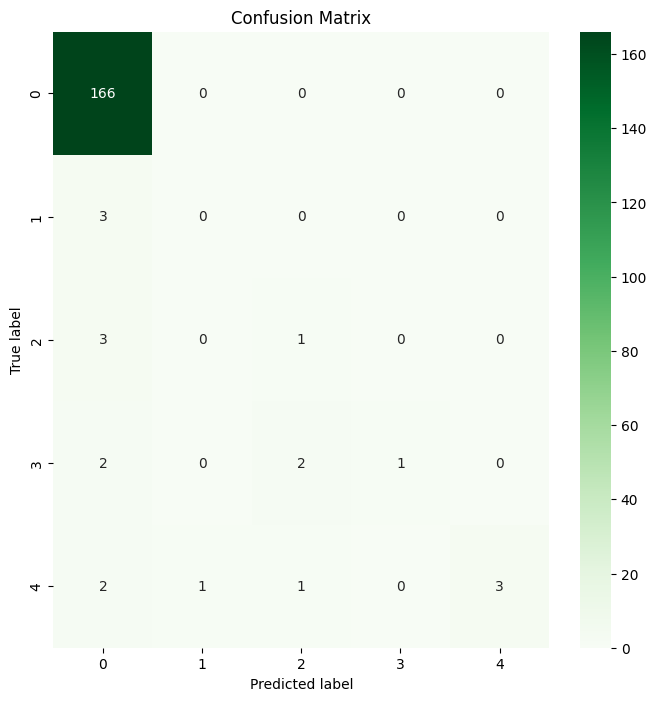

In [ ]:
# Test seti üzerinde tahminlerin hesaplanması
y_pred_knn_sfs = knn_model_sfs.predict(X_test_sfs)

# Karışıklık matrisinin gösterilmesi
confusion_matrix_knn_sfs = confusion_matrix(y_test, y_pred_knn_sfs)
plt.figure(figsize=(8, 8))
sns.heatmap(confusion_matrix_knn_sfs, annot=True, fmt='d', cmap='Greens')
plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [ ]:
# Doğruluk (accuracy) hesaplanması
accuracy_knn_sfs = accuracy_score(y_test, y_pred_knn_sfs)
print("Doğruluk (Accuracy):", accuracy_knn_sfs)
print()

# Sınıflandırma raporunun hesaplanması
report_knn_sfs = classification_report(y_test, y_pred_knn_sfs, zero_division=1)

# Raporun yazdırılması
print("Sınıflandırma Raporu:")
print(report_knn_sfs)

Doğruluk (Accuracy): 0.9243243243243243

Sınıflandırma Raporu:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       166
           1       0.00      0.00      0.00         3
           2       0.25      0.25      0.25         4
           3       1.00      0.20      0.33         5
           4       1.00      0.43      0.60         7

    accuracy                           0.92       185
   macro avg       0.64      0.38      0.43       185
weighted avg       0.92      0.92      0.91       185



In [ ]:
# KNN modeli oluşturma
knn_model_corr = KNeighborsClassifier(n_neighbors=4)

# Pearson Korelasyon ile modeli eğitme
knn_model_corr.fit(X_train_corr, y_train)

# Eğitilmiş modelin test seti üzerindeki doğruluk skoru hesaplaması
print("Pearson Korelasyon ile eğitilen verinin test skoru: ", knn_model_corr.score(X_test_corr, y_test))

Pearson Korelasyon ile eğitilen verinin test skoru:  0.9081081081081082


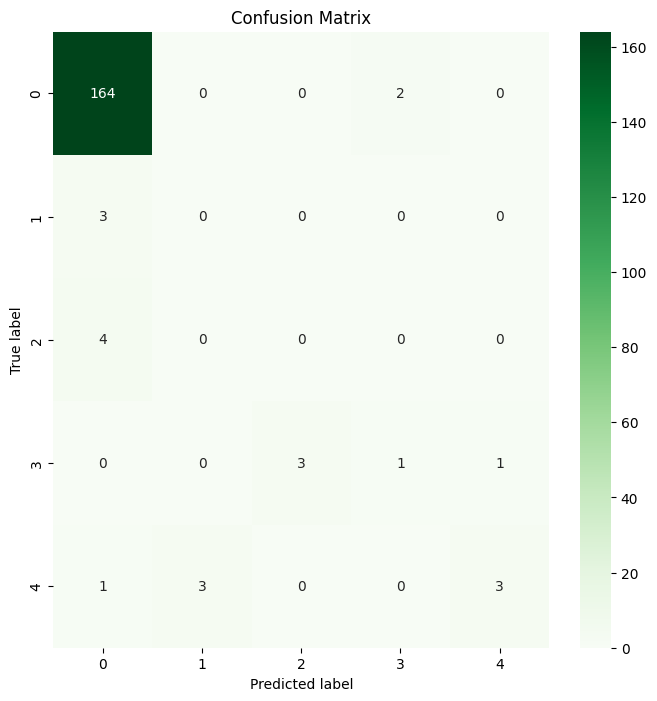

In [ ]:
# Test seti üzerinde tahminlerin hesaplanması
y_pred_knn_corr = knn_model_corr.predict(X_test_corr)

# Karışıklık matrisinin gösterilmesi
confusion_matrix_knn_corr = confusion_matrix(y_test, y_pred_knn_corr)
plt.figure(figsize=(8, 8))
sns.heatmap(confusion_matrix_knn_corr, annot=True, fmt='d', cmap='Greens')
plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [ ]:
# Doğruluk (accuracy) hesaplanması
accuracy_knn_corr = accuracy_score(y_test, y_pred_knn_corr)
print("Doğruluk (Accuracy):", accuracy_knn_corr)
print()

# Sınıflandırma raporunun hesaplanması
report_knn_corr = classification_report(y_test, y_pred_knn_corr, zero_division=1)

# Raporun yazdırılması
print("Sınıflandırma Raporu:")
print(report_knn_corr)

Doğruluk (Accuracy): 0.9081081081081082

Sınıflandırma Raporu:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       166
           1       0.00      0.00      0.00         3
           2       0.00      0.00      0.00         4
           3       0.33      0.20      0.25         5
           4       0.75      0.43      0.55         7

    accuracy                           0.91       185
   macro avg       0.41      0.32      0.35       185
weighted avg       0.89      0.91      0.90       185



In [ ]:
# KNN modeli oluşturma
knn_model_efs = KNeighborsClassifier(n_neighbors=4)

# Exhaustive ile modeli eğitme
knn_model_efs.fit(X_train_efs, y_train)

# Eğitilmiş modelin test seti üzerindeki doğruluk skoru hesaplaması
print("Exhaustive ile eğitilen verinin test skoru: ", knn_model_efs.score(X_test_efs, y_test))

Exhaustive ile eğitilen verinin test skoru:  0.9243243243243243


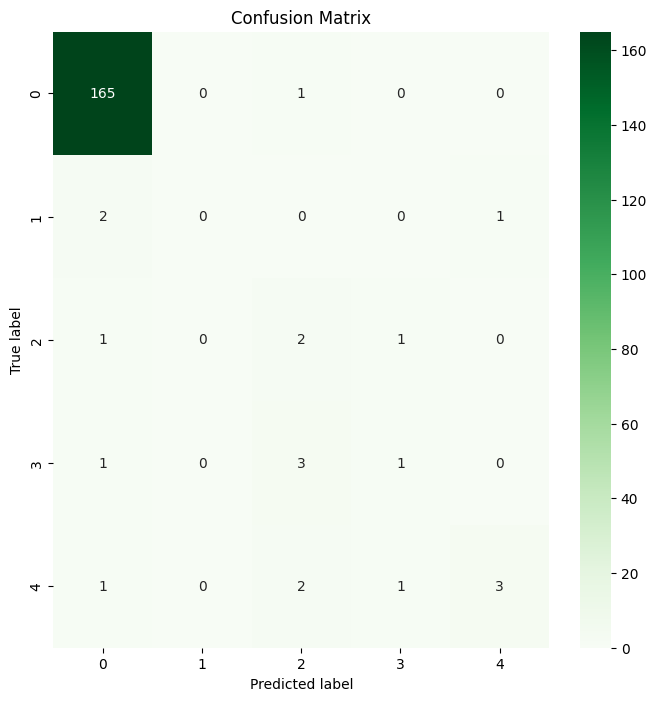

In [ ]:
# Test seti üzerinde tahminlerin hesaplanması
y_pred_knn_efs = knn_model_efs.predict(X_test_efs)

# Karışıklık matrisinin gösterilmesi
confusion_matrix_knn_efs = confusion_matrix(y_test, y_pred_knn_efs)
plt.figure(figsize=(8, 8))
sns.heatmap(confusion_matrix_knn_efs, annot=True, fmt='d', cmap='Greens')
plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [ ]:
# Doğruluk (accuracy) hesaplanması
accuracy_knn_efs = accuracy_score(y_test, y_pred_knn_efs)
print("Doğruluk (Accuracy):", accuracy_knn_efs)
print()

# Sınıflandırma raporunun hesaplanması
report_knn_efs = classification_report(y_test, y_pred_knn_efs, zero_division=1)

# Raporun yazdırılması
print("Sınıflandırma Raporu:")
print(report_knn_efs)

Doğruluk (Accuracy): 0.9243243243243243

Sınıflandırma Raporu:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       166
           1       1.00      0.00      0.00         3
           2       0.25      0.50      0.33         4
           3       0.33      0.20      0.25         5
           4       0.75      0.43      0.55         7

    accuracy                           0.92       185
   macro avg       0.66      0.42      0.42       185
weighted avg       0.93      0.92      0.92       185



# 2-) Decision Trees (Karar Ağaçları)
Karar ağacı, hem sınıflandırma hem de regresyon problemleri için kullanılabilen ancak çoğunlukla sınıflandırma problemlerinin çözümünde tercih edilen bir denetimli öğrenme tekniğidir. Amaç, veri özelliklerinden çıkarılan basit karar kurallarını öğrenerek bir hedef değişkenin değerini tahmin eden bir model oluşturmaktır. Karar ağacını kullanmanın iki nedeni vardır:

Karar ağaçları, karar verirken genellikle insan düşünme yeteneğini taklit eder, bu nedenle anlaşılması kolaydır.
Arkasındaki mantık, ağaç benzeri bir yapı gösterdiği için kolayca anlaşılabilir.
Karar ağacı tek bir düğüm ile başlar ve yeni sonuçlarla dallanmaya başlar. Bir ağaç oluşturmak için CART (Sınıflandırma ve Regresyon Ağacı) algoritması kullanılır.

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
# Karar ağacı modeli oluşturma
dt_model_sfs = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)

# Step forward ile modeli eğitme
dt_model_sfs.fit(X_train_sfs, y_train)

# Eğitilmiş modelin test seti üzerindeki doğruluk skoru hesaplaması
print("Step forward ile eğitilen verinin test skoru: ", dt_model_sfs.score(X_test_sfs, y_test))

Step forward ile eğitilen verinin test skoru:  0.9297297297297298


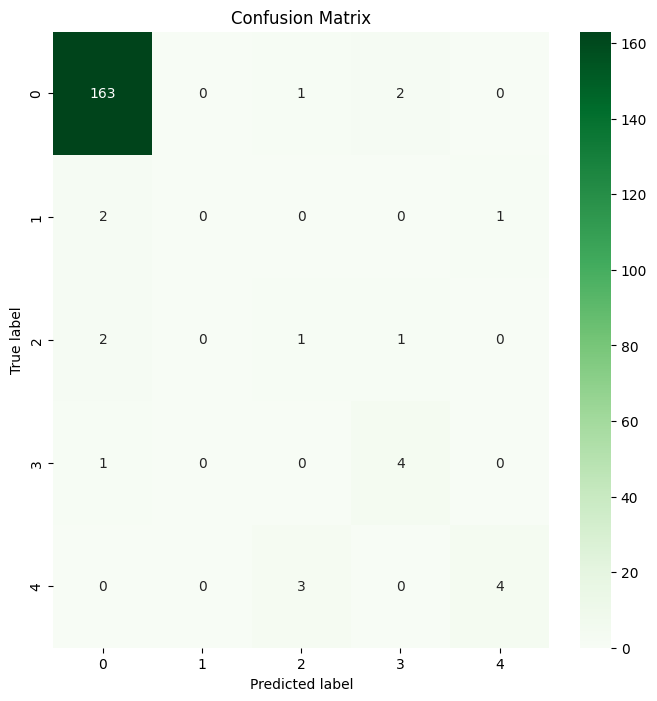

In [ ]:
# Test seti üzerinde tahminlerin hesaplanması
y_pred_dt_sfs = dt_model_sfs.predict(X_test_sfs)

# Karışıklık matrisinin gösterilmesi
confusion_matrix_dt_sfs = confusion_matrix(y_test, y_pred_dt_sfs)
plt.figure(figsize=(8, 8))
sns.heatmap(confusion_matrix_dt_sfs, annot=True, fmt='d', cmap='Greens')
plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [ ]:
# Doğruluk (accuracy) hesaplanması
accuracy_dt_sfs = accuracy_score(y_test, y_pred_dt_sfs)
print("Doğruluk (Accuracy):", accuracy_dt_sfs)
print()

# Sınıflandırma raporunun hesaplanması
report_dt_sfs = classification_report(y_test, y_pred_dt_sfs, zero_division=1)

# Raporun yazdırılması
print("Sınıflandırma Raporu:")
print(report_dt_sfs)

Doğruluk (Accuracy): 0.9297297297297298

Sınıflandırma Raporu:
              precision    recall  f1-score   support

           0       0.97      0.98      0.98       166
           1       1.00      0.00      0.00         3
           2       0.20      0.25      0.22         4
           3       0.57      0.80      0.67         5
           4       0.80      0.57      0.67         7

    accuracy                           0.93       185
   macro avg       0.71      0.52      0.51       185
weighted avg       0.94      0.93      0.92       185



In [ ]:
# Karar ağacı modeli oluşturma
dt_model_corr = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)

# Pearson Korelasyon ile modeli eğitme
dt_model_corr.fit(X_train_corr, y_train)

# Eğitilmiş modelin test seti üzerindeki doğruluk skoru hesaplaması
print("Pearson Korelasyon ile eğitilen verinin test skoru: ", dt_model_corr.score(X_test_corr, y_test))

Pearson Korelasyon ile eğitilen verinin test skoru:  0.918918918918919


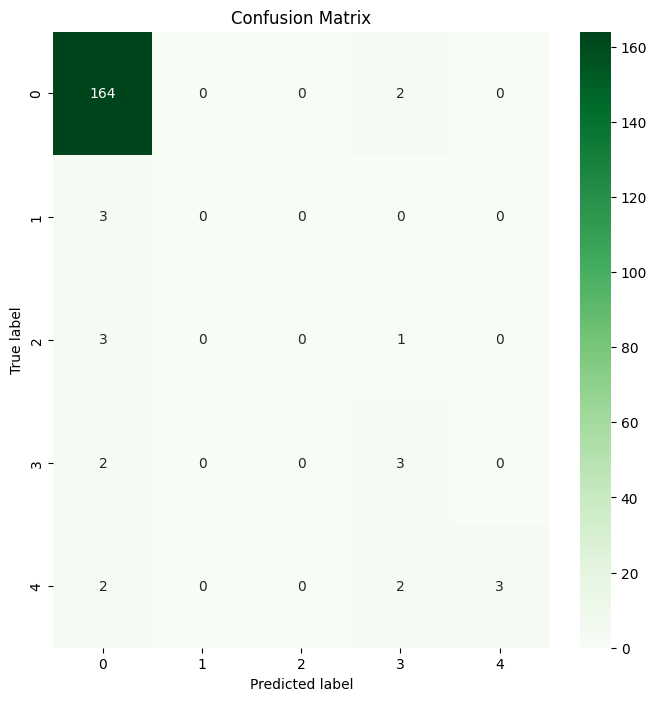

In [ ]:
# Test seti üzerinde tahminlerin hesaplanması
y_pred_dt_corr = dt_model_corr.predict(X_test_corr)

# Karışıklık matrisinin gösterilmesi
confusion_matrix_dt_corr = confusion_matrix(y_test, y_pred_dt_corr)
plt.figure(figsize=(8, 8))
sns.heatmap(confusion_matrix_dt_corr, annot=True, fmt='d', cmap='Greens')
plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [ ]:
# Doğruluk (accuracy) hesaplanması
accuracy_dt_corr = accuracy_score(y_test, y_pred_dt_corr)
print("Doğruluk (Accuracy):", accuracy_dt_corr)
print()

# Sınıflandırma raporunun hesaplanması
report_dt_corr = classification_report(y_test, y_pred_dt_corr, zero_division=1)

# Raporun yazdırılması
print("Sınıflandırma Raporu:")
print(report_dt_corr)

Doğruluk (Accuracy): 0.918918918918919

Sınıflandırma Raporu:
              precision    recall  f1-score   support

           0       0.94      0.99      0.96       166
           1       1.00      0.00      0.00         3
           2       1.00      0.00      0.00         4
           3       0.38      0.60      0.46         5
           4       1.00      0.43      0.60         7

    accuracy                           0.92       185
   macro avg       0.86      0.40      0.41       185
weighted avg       0.93      0.92      0.90       185



In [ ]:
# Karar ağacı modeli oluşturma
dt_model_efs = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)

# Exhaustive ile modeli eğitme
dt_model_efs.fit(X_train_efs, y_train)

# Eğitilmiş modelin test seti üzerindeki doğruluk skoru hesaplaması
print("Exhaustive ile eğitilen verinin test skoru: ", dt_model_efs.score(X_test_efs, y_test))

Exhaustive ile eğitilen verinin test skoru:  0.9135135135135135


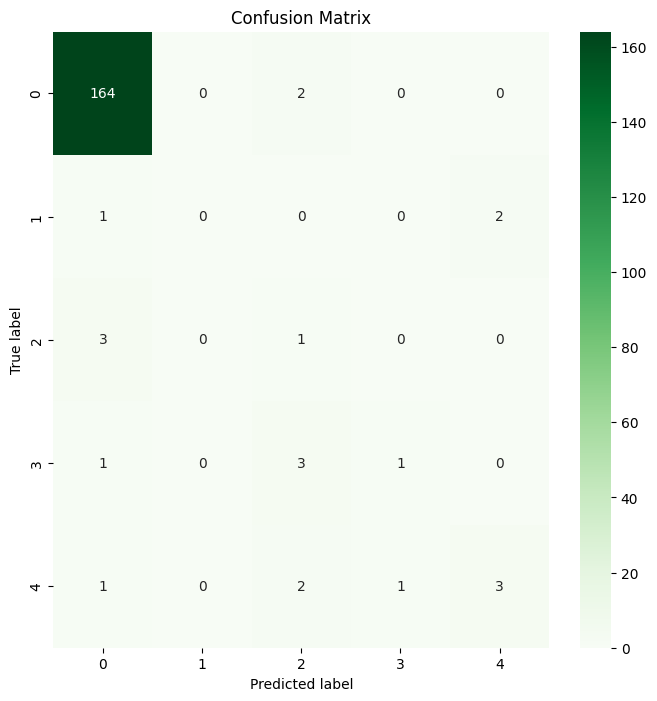

In [ ]:
# Test seti üzerinde tahminlerin hesaplanması
y_pred_dt_efs = dt_model_efs.predict(X_test_efs)

# Karışıklık matrisinin gösterilmesi
confusion_matrix_dt_efs = confusion_matrix(y_test, y_pred_dt_efs)
plt.figure(figsize=(8, 8))
sns.heatmap(confusion_matrix_dt_efs, annot=True, fmt='d', cmap='Greens')
plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [ ]:
# Doğruluk (accuracy) hesaplanması
accuracy_dt_efs = accuracy_score(y_test, y_pred_dt_efs)
print("Doğruluk (Accuracy):", accuracy_dt_efs)
print()

# Sınıflandırma raporunun hesaplanması
report_dt_efs = classification_report(y_test, y_pred_dt_efs, zero_division=1)

# Raporun yazdırılması
print("Sınıflandırma Raporu:")
print(report_dt_efs)

Doğruluk (Accuracy): 0.9135135135135135

Sınıflandırma Raporu:
              precision    recall  f1-score   support

           0       0.96      0.99      0.98       166
           1       1.00      0.00      0.00         3
           2       0.12      0.25      0.17         4
           3       0.50      0.20      0.29         5
           4       0.60      0.43      0.50         7

    accuracy                           0.91       185
   macro avg       0.64      0.37      0.39       185
weighted avg       0.92      0.91      0.91       185



# 3-) Naive Bayes Yöntemi
Naive Bayes sınıflandırıcısının temeli Bayes teoremine dayanır. lazy ( tembel ) bir öğrenme algoritmasıdır aynı zamanda dengesiz veri kümelerinde de çalışabilir. Algoritmanın çalışma şekli bir eleman için her durumun olasılığını hesaplar ve olasılık değeri en yüksek olana göre sınıflandırır.

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
#  Naive Bayes sınıflandırıcı modelini oluşturma
gnb_model_sfs = GaussianNB()

# Step forward ile modeli eğitme
gnb_model_sfs.fit(X_train_sfs, y_train)

# Eğitilmiş modelin test seti üzerindeki doğruluk skoru hesaplaması
print("Step forward ile eğitilen verinin test skoru: ", gnb_model_sfs.score(X_test_sfs, y_test))

Step forward ile eğitilen verinin test skoru:  0.9027027027027027


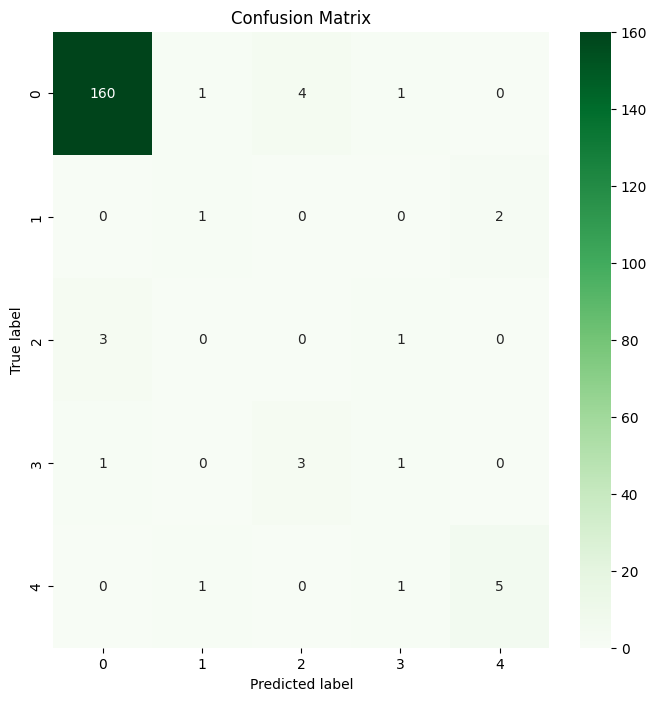

In [ ]:
# Test seti üzerinde tahminlerin hesaplanması
y_pred_gnb_sfs = gnb_model_sfs.predict(X_test_sfs)

# Karışıklık matrisinin gösterilmesi
confusion_matrix_gnb_sfs = confusion_matrix(y_test, y_pred_gnb_sfs)
plt.figure(figsize=(8, 8))
sns.heatmap(confusion_matrix_gnb_sfs, annot=True, fmt='d', cmap='Greens')
plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [ ]:
# Doğruluk (accuracy) hesaplanması
accuracy_gnb_sfs = accuracy_score(y_test, y_pred_gnb_sfs)
print("Doğruluk (Accuracy):", accuracy_gnb_sfs)
print()

# Sınıflandırma raporunun hesaplanması
report_gnb_sfs = classification_report(y_test, y_pred_gnb_sfs, zero_division=1)

# Raporun yazdırılması
print("Sınıflandırma Raporu:")
print(report_gnb_sfs)

Doğruluk (Accuracy): 0.9027027027027027

Sınıflandırma Raporu:
              precision    recall  f1-score   support

           0       0.98      0.96      0.97       166
           1       0.33      0.33      0.33         3
           2       0.00      0.00      0.00         4
           3       0.25      0.20      0.22         5
           4       0.71      0.71      0.71         7

    accuracy                           0.90       185
   macro avg       0.45      0.44      0.45       185
weighted avg       0.91      0.90      0.91       185



In [ ]:
# Naive Bayes sınıflandırıcı modelini oluşturma
gnb_model_corr = GaussianNB()

# Pearson Korelasyon ile modeli eğitme
gnb_model_corr.fit(X_train_corr, y_train)

# Eğitilmiş modelin test seti üzerindeki doğruluk skoru hesaplaması
print("Pearson Korelasyon ile eğitilen verinin test skoru: ", gnb_model_corr.score(X_test_corr, y_test))

Pearson Korelasyon ile eğitilen verinin test skoru:  0.8918918918918919


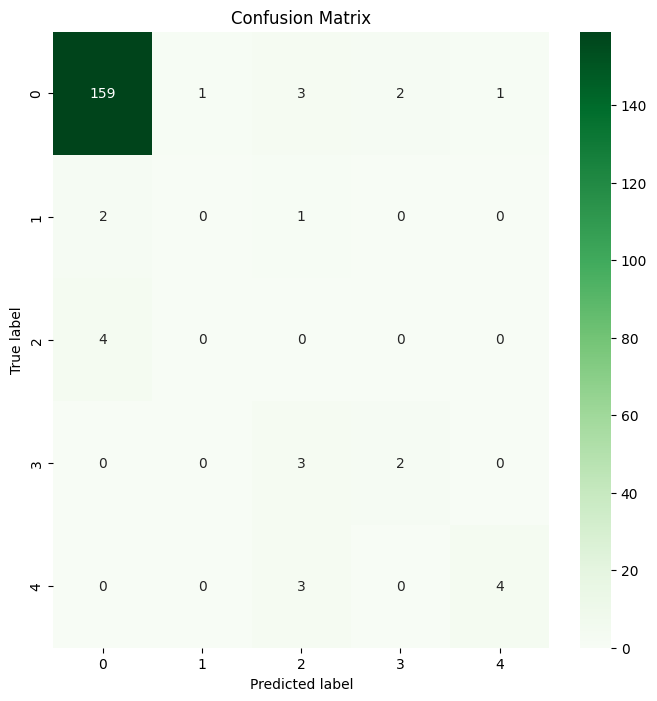

In [ ]:
# Test seti üzerinde tahminlerin hesaplanması
y_pred_gnb_corr = gnb_model_corr.predict(X_test_corr)

# Karışıklık matrisinin gösterilmesi
confusion_matrix_gnb_corr = confusion_matrix(y_test, y_pred_gnb_corr)
plt.figure(figsize=(8, 8))
sns.heatmap(confusion_matrix_gnb_corr, annot=True, fmt='d', cmap='Greens')
plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [ ]:
# Doğruluk (accuracy) hesaplanması
accuracy_gnb_corr = accuracy_score(y_test, y_pred_gnb_corr)
print("Doğruluk (Accuracy):", accuracy_gnb_corr)
print()

# Sınıflandırma raporunun hesaplanması
report_gnb_corr = classification_report(y_test, y_pred_gnb_corr, zero_division=1)

# Raporun yazdırılması
print("Sınıflandırma Raporu:")
print(report_gnb_corr)

Doğruluk (Accuracy): 0.8918918918918919

Sınıflandırma Raporu:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       166
           1       0.00      0.00      0.00         3
           2       0.00      0.00      0.00         4
           3       0.50      0.40      0.44         5
           4       0.80      0.57      0.67         7

    accuracy                           0.89       185
   macro avg       0.45      0.39      0.41       185
weighted avg       0.91      0.89      0.90       185



In [ ]:
# Naive Bayes sınıflandırıcı modelini oluşturma
gnb_model_efs = GaussianNB()

# Exhaustive ile modeli eğitme
gnb_model_efs.fit(X_train_efs, y_train)

# Eğitilmiş modelin test seti üzerindeki doğruluk skoru hesaplaması
print("Exhaustive ile eğitilen verinin test skoru: ", gnb_model_efs.score(X_test_efs, y_test))

Exhaustive ile eğitilen verinin test skoru:  0.8756756756756757


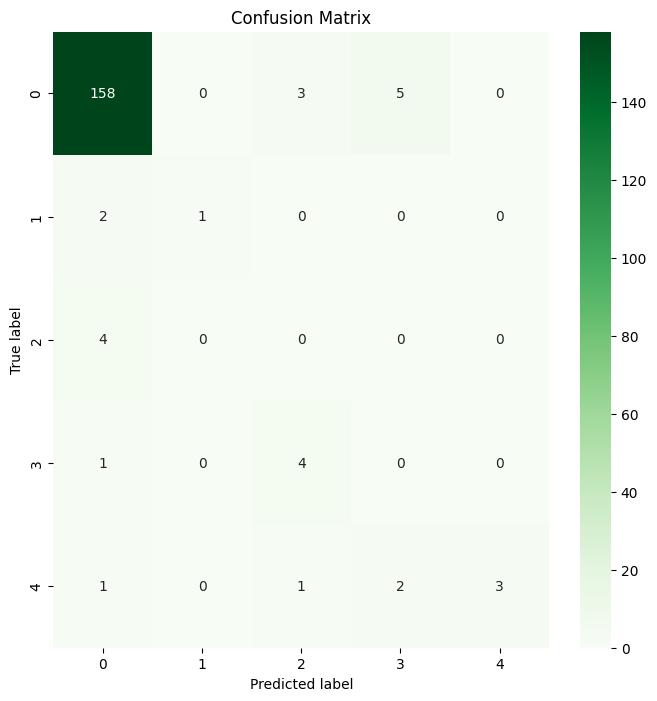

In [ ]:
# Test seti üzerinde tahminlerin hesaplanması
y_pred_gnb_efs = gnb_model_efs.predict(X_test_efs)

# Karışıklık matrisinin gösterilmesi
confusion_matrix_gnb_efs = confusion_matrix(y_test, y_pred_gnb_efs)
plt.figure(figsize=(8, 8))
sns.heatmap(confusion_matrix_gnb_efs, annot=True, fmt='d', cmap='Greens')
plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [ ]:
# Doğruluk (accuracy) hesaplanması
accuracy_gnb_efs = accuracy_score(y_test, y_pred_gnb_efs)
print("Doğruluk (Accuracy):", accuracy_gnb_efs)
print()

# Sınıflandırma raporunun hesaplanması
report_gnb_efs = classification_report(y_test, y_pred_gnb_efs, zero_division=1)

# Raporun yazdırılması
print("Sınıflandırma Raporu:")
print(report_gnb_efs)

Doğruluk (Accuracy): 0.8756756756756757

Sınıflandırma Raporu:
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       166
           1       1.00      0.33      0.50         3
           2       0.00      0.00      0.00         4
           3       0.00      0.00      0.00         5
           4       1.00      0.43      0.60         7

    accuracy                           0.88       185
   macro avg       0.59      0.34      0.41       185
weighted avg       0.91      0.88      0.88       185



Accuracy: Modelde doğru tahmin ettiğimiz alanların toplam veri kümesine oranı ile hesaplanmaktır.

*   TP+TN/TP+TN+FN+FP

Precision (Kesinlik): Pozitif olarak tahminlediğimiz değerlerin gerçekten kaç adedinin Pozitif olduğunu göstermektedir.

*   TP/TP+FP*

Recall (Duyarlılık): Pozitif olarak tahmin etmemiz gerekenlerin nekadarını pozitif olarak tahmin ettiğimizdir.

*   TP/TP+FN

F1 Score: Kesinlik ve Duyarlılığın harmonik ortalamasıdır.

*   2 * precision*recall/precision+recall